In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Create coffee dataframes from Yelp csv files
raleighC_df = pd.read_csv("resources/yelp_data_coffee_raleigh-output_data.csv")
ashevilleC_df = pd.read_csv("resources/yelp_data_coffee_asheville-output_data.csv")

## Asheville Coffee Shop Analysis

In [2]:
#Create new Asheville dataframe with the columns you need (alias, coordinates, name, price, rating, review_count)
new_asheville_df = ashevilleC_df[['alias', 'name', 'rating','review_count', 'coordinates']]
new_asheville_df.head()

,alias,name,rating,review_count,coordinates
0,dunkin-donuts-asheville,Dunkin Donuts,4.0,9,"{'latitude': 35.613098, 'longitude': -82.554748}"
1,krispy-kreme-asheville-2,Krispy Kreme,3.0,18,"{'latitude': 35.58655, 'longitude': -82.58926}"
2,starbucks-asheville-8,Starbucks,3.5,9,"{'latitude': 35.586698, 'longitude': -82.587045}"
3,high-five-coffee-riverside-woodfin,High Five Coffee - Riverside,5.0,10,"{'latitude': 35.63475, 'longitude': -82.59922}"
4,starbucks-asheville,Starbucks,3.0,14,"{'latitude': 35.580738, 'longitude': -82.526077}"


In [3]:
unique_asheville_alias = len(ashevilleC_df['alias'].unique())
unique_asheville_alias

43

In [4]:
#Sort Asheville dataframe by ratings
top_ashevilleC = new_asheville_df.sort_values(['rating'], ascending=False)
top_ashevilleC

,alias,name,rating,review_count,coordinates
27,pennycup-coffee-asheville-3,PennyCup Coffee,5.0,2,"{'latitude': 35.62769, 'longitude': -82.55263}"
3,high-five-coffee-riverside-woodfin,High Five Coffee - Riverside,5.0,10,"{'latitude': 35.63475, 'longitude': -82.59922}"
19,moments-coffee-bar-and-catering-swannanoa,Moments Coffee Bar and Catering,5.0,8,"{'latitude': 35.601305, 'longitude': -82.38498}"
18,the-coffee-garage-fletcher,The Coffee Garage,5.0,8,"{'latitude': 35.43452, 'longitude': -82.50219}"
10,vendarie-asheville-2,Vendarie,5.0,2,"{'latitude': 35.5670739, 'longitude': -82.5356..."
34,starbucks-swannanoa,Starbucks,5.0,2,"{'latitude': 35.598042, 'longitude': -82.407978}"
28,starbucks-arden-3,Starbucks,4.5,5,"{'latitude': 35.4460015, 'longitude': -82.5321..."
7,rolled-and-roasted-asheville-2,Rolled & Roasted,4.5,5,"{'latitude': 35.5809, 'longitude': -82.526672}"
9,fletcher-village-bakery-fletcher,Fletcher Village Bakery,4.5,25,"{'latitude': 35.440242, 'longitude': -82.505607}"
35,moments-swannanoa,Moments,4.0,4,"{'latitude': 35.5991058349609, 'longitude': -8..."


In [5]:
#Group Asheville coffee shops by rating
top_ashevilleC_rating = top_ashevilleC.groupby('rating')
count_ashevilleC_rating = top_ashevilleC_rating['rating'].count()
count_ashevilleC_rating

rating
1.0     3
1.5     2
2.0    10
2.5     5
3.0     5
3.5     3
4.0     6
4.5     3
5.0     6
Name: rating, dtype: int64

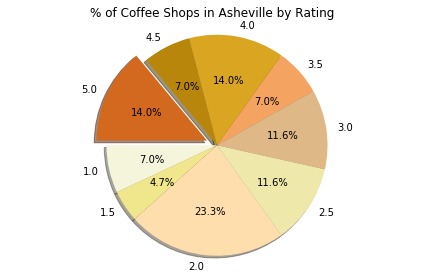

In [6]:
#Create a pie chart of coffee shops by rating
ratings = ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']
shops = count_ashevilleC_rating

colors = ['beige', 'khaki', 'navajowhite', 'palegoldenrod',
         'burlywood', 'sandybrown', 'goldenrod', 'darkgoldenrod', 'chocolate',
         'saddlebrown']
explode = (0,0,0,0,0,0,0,0, 0.1)

plt.pie(shops, explode=explode, labels=ratings, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('% of Coffee Shops in Asheville by Rating')
plt.tight_layout()
plt.savefig("Images/AshevilleRatings.png")
plt.show()

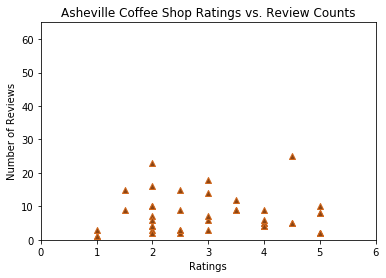

In [7]:
#Create scatter plot to compare ratings and review counts
ratings = top_ashevilleC['rating']
review_cts = top_ashevilleC['review_count']

plt.scatter(ratings, review_cts, marker="^", facecolors='saddlebrown', edgecolors='chocolate')
plt.ylim(0,65)
plt.xlim(0,6)

plt.title('Asheville Coffee Shop Ratings vs. Review Counts')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')

plt.savefig("Images/Asheville Ratings_v_Reviews")
plt.show()

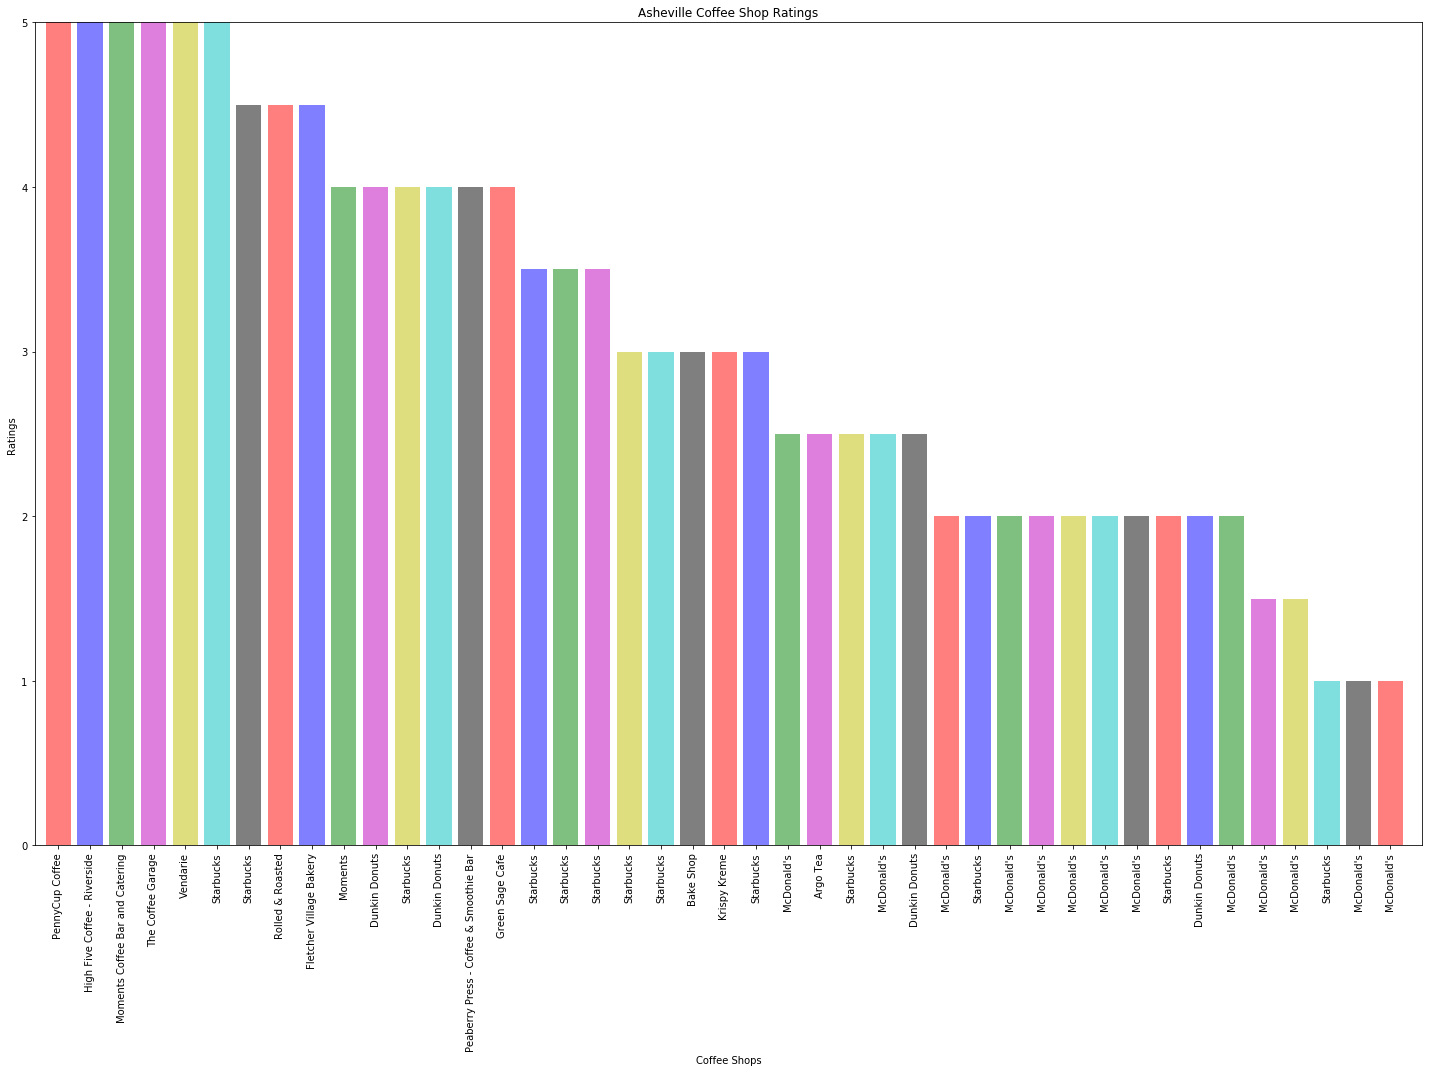

In [16]:
#Bar graph: Asheville
x_axis = np.arange(len(top_ashevilleC))
tick_locations = [value for value in x_axis]
my_colors = 'rbgmyck'

plt.figure(figsize=(20,15))
plt.bar(x_axis, top_ashevilleC['rating'], color=my_colors, alpha=0.5, align='center')
plt.xticks(tick_locations, top_ashevilleC['name'], rotation='vertical')
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(top_ashevilleC['rating']))

plt.title('Asheville Coffee Shop Ratings')
plt.xlabel('Coffee Shops')
plt.ylabel('Ratings')

plt.tight_layout()
plt.savefig("Images/AshevilleCoffeeShopRatings.png")
plt.show()

## Raleigh Coffee Shop Analysis

In [8]:
#Create new Raleigh dataframe with only the columns you need (alias, coordinates, name, price, rating, review_count)
new_raleigh_df = raleighC_df[['alias', 'name','rating', 'review_count', 'coordinates']]
new_raleigh_df.head()

,alias,name,rating,review_count,coordinates
0,starbucks-raleigh-22,Starbucks,3.0,38,"{'latitude': 35.816105, 'longitude': -78.693763}"
1,starbucks-raleigh-21,Starbucks,4.0,16,"{'latitude': 35.824885, 'longitude': -78.707222}"
2,starbucks-raleigh-19,Starbucks,4.0,14,"{'latitude': 35.866613, 'longitude': -78.57499}"
3,starbucks-raleigh-17,Starbucks,3.5,27,"{'latitude': 35.904845, 'longitude': -78.60199}"
4,starbucks-raleigh-16,Starbucks,3.5,28,"{'latitude': 35.887828, 'longitude': -78.67873..."


In [9]:
#Data analysis - to make sure no duplicates exist
unique_raleigh_alias = len(raleighC_df['alias'].unique())
unique_raleigh_alias

89

In [10]:
#Sort Raleigh dataframe by ratings (descending = highly rated)
top_raleighC = new_raleigh_df.sort_values(['rating'], ascending=False)
top_raleighC

,alias,name,rating,review_count,coordinates
85,starbucks-cary-14,Starbucks,5.0,1,"{'latitude': 35.775164, 'longitude': -78.764947}"
10,hillsborough-mart-raleigh,Hillsborough Mart,5.0,5,"{'latitude': 35.7831199, 'longitude': -78.65621}"
73,western-dragon-teas-and-tisanes-raleigh,Western Dragon Teas & Tisanes,5.0,2,"{'latitude': 35.77945, 'longitude': -78.64568}"
64,holy-moly-cannoli-durham,Holy Moly Cannoli,5.0,7,"{'latitude': 35.93373, 'longitude': -79.01584}"
23,kale-me-crazy-raleigh-2,Kale Me Crazy,4.5,3,"{'latitude': 35.7910333, 'longitude': -78.6609..."
13,mcdonalds-raleigh-6,McDonald's,4.5,6,"{'latitude': 35.7237350457159, 'longitude': -7..."
35,starbucks-raleigh-43,Starbucks,4.5,3,"{'latitude': 35.78347336, 'longitude': -78.670..."
41,port-city-java-raleigh-6,Port City Java,4.5,2,"{'latitude': 35.79738, 'longitude': -78.70438}"
28,crema-raleigh-2,Crema,4.5,4,"{'latitude': 35.7744, 'longitude': -78.63936}"
66,hill-of-beans-raleigh,Hill Of Beans,4.0,1,"{'latitude': 35.7875118, 'longitude': -78.6696..."


In [11]:
#Group Raleigh coffee shops by rating
top_raleighC_rating = top_raleighC.groupby('rating')
count_raleighC_rating = top_raleighC_rating['rating'].count()
count_raleighC_rating

rating
1.0     4
1.5    14
2.0     9
2.5    15
3.0    16
3.5    12
4.0    10
4.5     5
5.0     4
Name: rating, dtype: int64

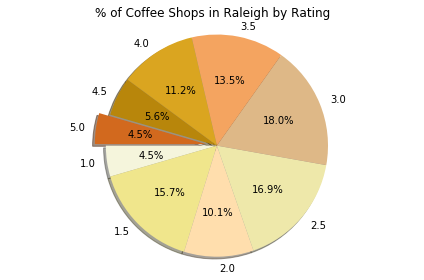

In [12]:
#Create a pie chart of Raleigh coffee shops by rating
ratings = ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']
shops = count_raleighC_rating

colors = ['beige', 'khaki', 'navajowhite', 'palegoldenrod',
         'burlywood', 'sandybrown', 'goldenrod', 'darkgoldenrod', 'chocolate',
         'saddlebrown']
explode = (0,0,0,0,0,0,0,0, 0.1)

plt.pie(shops, explode=explode, labels=ratings, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('% of Coffee Shops in Raleigh by Rating')
plt.tight_layout()
plt.savefig("Images/RaleighRatings.png")
plt.show()


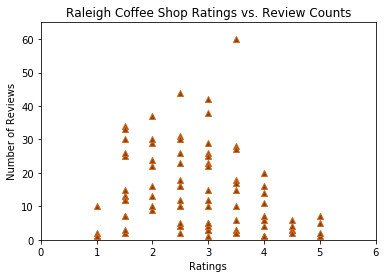

In [13]:
#Create scatter plot to compare ratings and review counts
ratings = top_raleighC['rating']
review_cts = top_raleighC['review_count']

plt.scatter(ratings, review_cts, marker="^", facecolors='saddlebrown', edgecolors='chocolate')
plt.ylim(0,65)
plt.xlim(0,6)

plt.title('Raleigh Coffee Shop Ratings vs. Review Counts')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')

plt.savefig("Images/Ratings_v_Reviews")
plt.show()

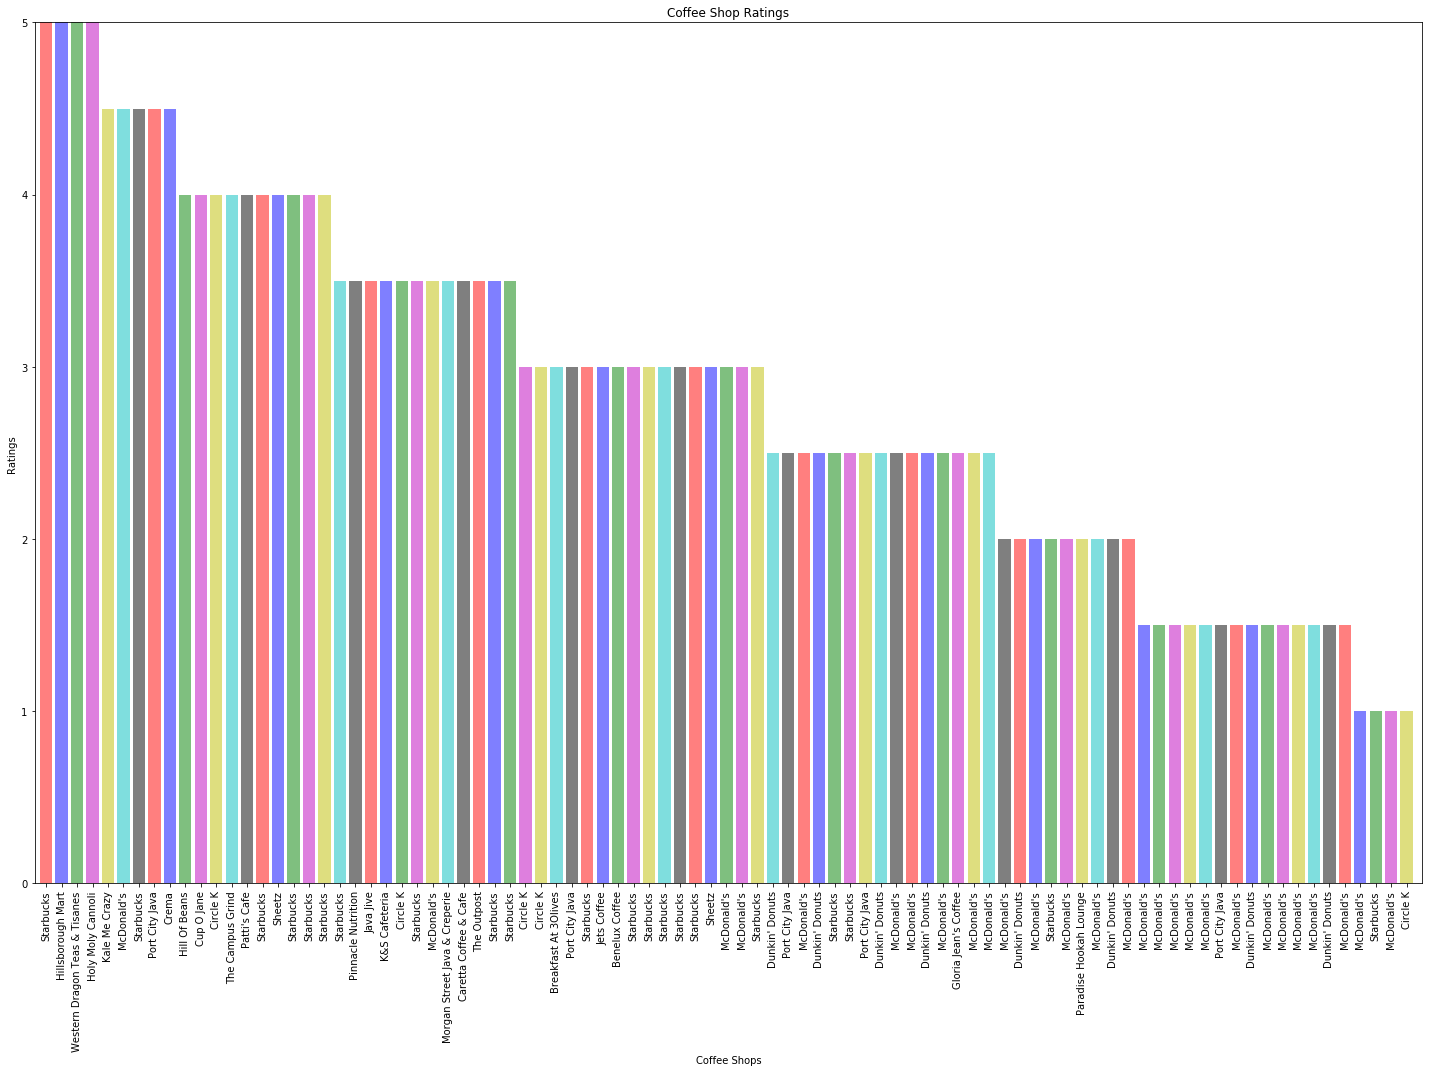

In [14]:
#Bar graph: Raleigh
x_axis = np.arange(len(top_raleighC))
tick_locations = [value for value in x_axis]
my_colors = 'rbgmyck'

plt.figure(figsize=(20, 15))
plt.bar(x_axis, top_raleighC['rating'], color=my_colors, alpha=0.5, align='center')
plt.xticks(tick_locations, top_raleighC['name'], rotation='vertical')
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(top_raleighC['rating']))

plt.title("Raleigh Coffee Shop Ratings")
plt.xlabel("Coffee Shops")
plt.ylabel("Ratings")

plt.tight_layout()
#plt.savefig("Images/CoffeeShopRatings1.png")
plt.show()